# Machine Learning Exercise 3 - Multi-Class Classification

This exercise will be an implementation of a one-vs-all logistic regression and neural network to recognize hand-written digits. It will be an extension of the logistic regression that was written for exercise 2, and applied to the one-vs-all classification.  

The dataset is ex3data.mat that contains 5000 training examples of handwritten digits. 

The data is in MATLAB / OCTAVE native format, which can be converted into a python-readable format using a SciPy utility.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

data = loadmat('ex3_data/ex3data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [2]:
data['X'].shape, data['y'].shape


((5000, 400), (5000, 1))

So each of the images are represented in a 400-dimensional vector. The 400 "features" are grayscale intensities of each pixel in the original 20 x 20 image. The class labels are in the vector y as a number representing the image. Let's see what it looks like

In [36]:
temp = np.matrix(data['X']) # extracting the X values
first_example = temp[4488,:] # just a random index
first_example_reshaped = first_example.reshape(20,20) # reshaping the list as 20 x 20 array

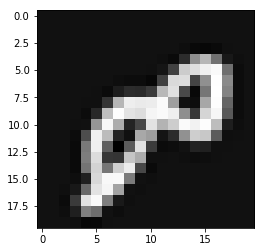

In [35]:
plt.imshow(first_example_reshaped) # here's what it looks like

In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [38]:
def cost(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

Next we need the function that computes the gradient. Again, we already defined this in the previous exercise